In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model('/drive/MyDrive/Hackathon_by_the_sea/model1.keras')

# Load and preprocess the satellite image
def load_image(image_path):
    """Load the image."""
    image = Image.open(image_path)
    return np.array(image)

# Divide the image into squares of size 32x32, cutting off edges if necessary
def divide_image(image, square_size):
    """Divide the image into squares of a fixed size, cutting off edges."""
    height, width, _ = image.shape
    cropped_height = (height // square_size) * square_size
    cropped_width = (width // square_size) * square_size

    image_cropped = image[:cropped_height, :cropped_width]

    squares = []
    for i in range(0, cropped_height, square_size):
        for j in range(0, cropped_width, square_size):
            square = image_cropped[i:i + square_size, j:j + square_size]
            squares.append(square)

    return squares, cropped_height, cropped_width

# Predict wildfire likelihood for each square
def predict_wildfire_likelihood(model, squares):
    """Predict wildfire likelihood for each square."""
    probabilities = []
    for square in squares:
        square_resized = tf.image.resize(square, (32, 32))  # Resize to model's input size
        square_normalized = square_resized / 255.0           # Normalize pixel values
        square_batch = np.expand_dims(square_normalized, axis=0)  # Add batch dimension
        prob = model.predict(square_batch)[0][0]             # Get the prediction
        probabilities.append(prob)

    return probabilities


# Visualize the results
def visualize_results(image, square_size, cropped_height, cropped_width, probabilities):
    """Visualize the probabilities on the cropped image."""
    fig, ax = plt.subplots()
    ax.imshow(image[:cropped_height, :cropped_width])
    grid_size_y = cropped_height // square_size
    grid_size_x = cropped_width // square_size

    for i in range(grid_size_y):
        for j in range(grid_size_x):
            prob = probabilities[i * grid_size_x + j]
            x = j * square_size
            y = i * square_size
            ax.text(x + square_size // 2, y + square_size // 2, f'{prob:.2f}',
                    color='red', fontsize=12, ha='center', va='center')

    plt.show()

# Main script
if __name__ == "__main__":
    # Path to your satellite image
    image_path = 'LA.jpg'

    # Load the image
    image = load_image(image_path)

    # Divide the image into squares of size 32x32
    square_size = 32
    squares, cropped_height, cropped_width = divide_image(image, square_size)

    # Predict wildfire likelihood for each square
    probabilities = predict_wildfire_likelihood(model, squares)

    # Visualize the results
    visualize_results(image, square_size, cropped_height, cropped_width, probabilities)


ValueError: File not found: filepath=/drive/MyDrive/Hackathon_by_the_sea/model1.keras. Please ensure the file is an accessible `.keras` zip file.

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━

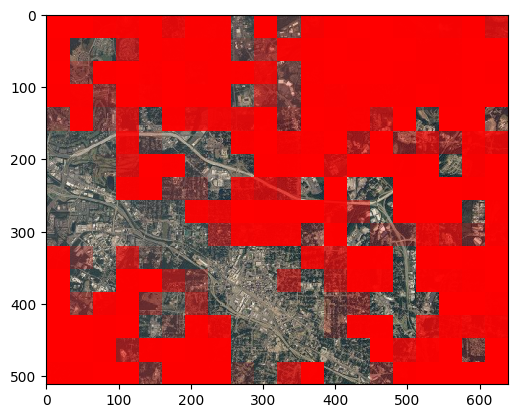

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the trained model
from google.colab import drive
drive.mount('/drive')
model = tf.keras.models.load_model('/drive/MyDrive/Hackathon_by_the_sea/model1.keras')

# Load and preprocess the satellite image
def load_image(image_path):
    """Load the image."""
    image = Image.open(image_path)
    return np.array(image)

# Divide the image into squares of size 32x32, cutting off edges if necessary
def divide_image(image, square_size):
    """Divide the image into squares of a fixed size, cutting off edges."""
    height, width, _ = image.shape
    cropped_height = (height // square_size) * square_size
    cropped_width = (width // square_size) * square_size

    image_cropped = image[:cropped_height, :cropped_width]

    squares = []
    for i in range(0, cropped_height, square_size):
        for j in range(0, cropped_width, square_size):
            square = image_cropped[i:i + square_size, j:j + square_size]
            squares.append(square)

    return squares, cropped_height, cropped_width

# Predict wildfire likelihood for each square
def predict_wildfire_likelihood(model, squares):
    """Predict wildfire likelihood for each square."""
    probabilities = []
    for square in squares:
        square_resized = tf.image.resize(square, (32, 32))  # Resize to model's input size
        square_normalized = square_resized / 255.0           # Normalize pixel values
        square_batch = np.expand_dims(square_normalized, axis=0)  # Add batch dimension
        prob = model.predict(square_batch)[0][0]             # Get the prediction
        probabilities.append(prob)

    return probabilities

# Visualize the results
def visualize_results(image, square_size, cropped_height, cropped_width, probabilities):
    """Visualize the probabilities on the cropped image with darker red for higher values."""
    fig, ax = plt.subplots()
    ax.imshow(image[:cropped_height, :cropped_width])
    grid_size_y = cropped_height // square_size
    grid_size_x = cropped_width // square_size

    for i in range(grid_size_y):
        for j in range(grid_size_x):
            prob = probabilities[i * grid_size_x + j]
            x = j * square_size
            y = i * square_size
            red_intensity = prob  # Use probability for red intensity
            rect = patches.Rectangle((x, y), square_size, square_size, linewidth=0,
                                     edgecolor='none', facecolor=(1, 0, 0, red_intensity))  # RGBA
            ax.add_patch(rect)

    plt.show()

# Main script
if __name__ == "__main__":
    # Path to your satellite image
    image_path = 'du.jpg'

    # Load the image
    image = load_image(image_path)

    # Divide the image into squares of size 32x32
    square_size = 32
    squares, cropped_height, cropped_width = divide_image(image, square_size)

    # Predict wildfire likelihood for each square
    probabilities = predict_wildfire_likelihood(model, squares)

    # Visualize the results
    visualize_results(image, square_size, cropped_height, cropped_width, probabilities)


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━

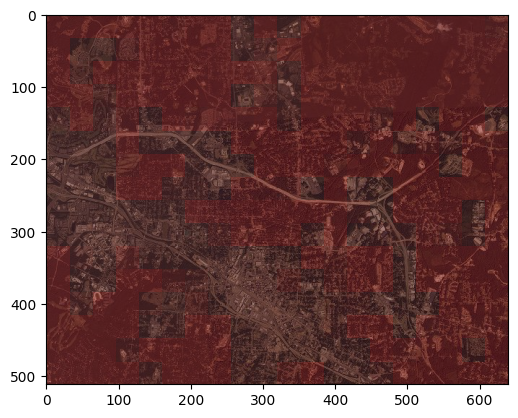

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Load the trained model
from google.colab import drive
drive.mount('/drive')
model = tf.keras.models.load_model('/drive/MyDrive/Hackathon_by_the_sea/model1.keras')

# Load and preprocess the satellite image
def load_image(image_path):
    """Load the image."""
    image = Image.open(image_path)
    return np.array(image)

# Divide the image into squares of size 32x32, cutting off edges if necessary
def divide_image(image, square_size):
    """Divide the image into squares of a fixed size, cutting off edges."""
    height, width, _ = image.shape
    cropped_height = (height // square_size) * square_size
    cropped_width = (width // square_size) * square_size

    image_cropped = image[:cropped_height, :cropped_width]

    squares = []
    for i in range(0, cropped_height, square_size):
        for j in range(0, cropped_width, square_size):
            square = image_cropped[i:i + square_size, j:j + square_size]
            squares.append(square)

    return squares, cropped_height, cropped_width

# Predict wildfire likelihood for each square
def predict_wildfire_likelihood(model, squares):
    """Predict wildfire likelihood for each square."""
    probabilities = []
    for square in squares:
        square_resized = tf.image.resize(square, (32, 32))  # Resize to model's input size
        square_normalized = square_resized / 255.0           # Normalize pixel values
        square_batch = np.expand_dims(square_normalized, axis=0)  # Add batch dimension
        prob = model.predict(square_batch)[0][0]             # Get the prediction
        probabilities.append(prob)

    return probabilities

# Visualize the results
def visualize_results(image, square_size, cropped_height, cropped_width, probabilities):
    """Visualize the probabilities on the cropped image with darker maroon for higher values."""
    fig, ax = plt.subplots()
    ax.imshow(image[:cropped_height, :cropped_width])
    grid_size_y = cropped_height // square_size
    grid_size_x = cropped_width // square_size

    for i in range(grid_size_y):
        for j in range(grid_size_x):
            prob = probabilities[i * grid_size_x + j]
            x = j * square_size
            y = i * square_size
            red_intensity = 0.5 + 0.5 * prob  # Scale intensity between 0.5 and 1 for maroon
            rect = patches.Rectangle((x, y), square_size, square_size, linewidth=0,
                                     edgecolor='none', facecolor=(0.5 * red_intensity, 0, 0, 0.5))  # RGBA with transparency
            ax.add_patch(rect)

    plt.show()

# Main script
if __name__ == "__main__":
    # Path to your satellite image
    image_path = 'du.jpg'

    # Load the image
    image = load_image(image_path)

    # Divide the image into squares of size 32x32
    square_size = 32
    squares, cropped_height, cropped_width = divide_image(image, square_size)

    # Predict wildfire likelihood for each square
    probabilities = predict_wildfire_likelihood(model, squares)

    # Visualize the results
    visualize_results(image, square_size, cropped_height, cropped_width, probabilities)


Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 822ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━

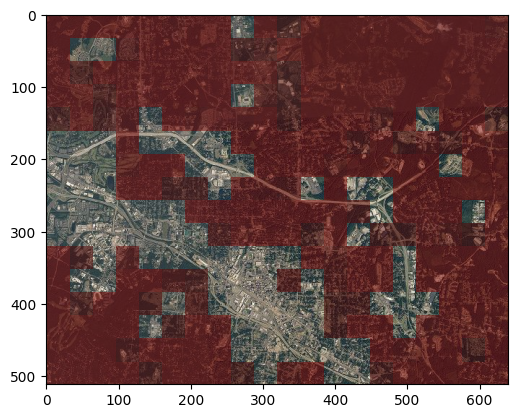

In [ ]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Load the trained model
from google.colab import drive
drive.mount('/drive')
model = tf.keras.models.load_model('/drive/MyDrive/Hackathon_by_the_sea/model1.keras')

# Load and preprocess the satellite image
def load_image(image_path):
    """Load the image."""
    image = Image.open(image_path)
    return np.array(image)

# Divide the image into squares of size 32x32, cutting off edges if necessary
def divide_image(image, square_size):
    """Divide the image into squares of a fixed size, cutting off edges."""
    height, width, _ = image.shape
    cropped_height = (height // square_size) * square_size
    cropped_width = (width // square_size) * square_size

    image_cropped = image[:cropped_height, :cropped_width]

    squares = []
    for i in range(0, cropped_height, square_size):
        for j in range(0, cropped_width, square_size):
            square = image_cropped[i:i + square_size, j:j + square_size]
            squares.append(square)

    return squares, cropped_height, cropped_width

# Predict wildfire likelihood for each square
def predict_wildfire_likelihood(model, squares):
    """Predict wildfire likelihood for each square."""
    probabilities = []
    for square in squares:
        square_resized = tf.image.resize(square, (32, 32))  # Resize to model's input size
        square_normalized = square_resized / 255.0           # Normalize pixel values
        square_batch = np.expand_dims(square_normalized, axis=0)  # Add batch dimension
        prob = model.predict(square_batch)[0][0]             # Get the prediction
        probabilities.append(prob)

    return probabilities

# Visualize the results
def visualize_results(image, square_size, cropped_height, cropped_width, probabilities):
    """Visualize the probabilities on the cropped image with darker maroon for higher values."""
    fig, ax = plt.subplots()
    ax.imshow(image[:cropped_height, :cropped_width])
    grid_size_y = cropped_height // square_size
    grid_size_x = cropped_width // square_size

    for i in range(grid_size_y):
        for j in range(grid_size_x):
            prob = probabilities[i * grid_size_x + j]
            x = j * square_size
            y = i * square_size

            # Check if the square is predominantly water (high blue RGB values)
            square = image[y:y + square_size, x:x + square_size]
            avg_color = np.mean(square, axis=(0, 1))
            if avg_color[2] > 1.5 * max(avg_color[0], avg_color[1]):  # Predominantly blue
                continue  # Skip adding overlay for water squares

            if prob > 0.1:  # Only apply overlay for significant probabilities
                red_intensity = 0.5 + 0.5 * prob  # Scale intensity between 0.5 and 1 for maroon
                rect = patches.Rectangle((x, y), square_size, square_size, linewidth=0,
                                         edgecolor='none', facecolor=(0.5 * red_intensity, 0, 0, 0.5))  # RGBA with transparency
                ax.add_patch(rect)

    plt.show()

# Main script
if __name__ == "__main__":
    # Path to your satellite image
    image_path = 'du.jpg'

    # Load the image
    image = load_image(image_path)

    # Divide the image into squares of size 32x32
    square_size = 32
    squares, cropped_height, cropped_width = divide_image(image, square_size)

    # Predict wildfire likelihood for each square
    probabilities = predict_wildfire_likelihood(model, squares)

    # Visualize the results
    visualize_results(image, square_size, cropped_height, cropped_width, probabilities)

    # Save the final image
    image = (image * 255).astype(np.uint8)  # Convert to uint8 if needed
    cv2.imwrite("final.png", image)


In [ ]:
import base64
from openai import OpenAI

client = OpenAI(
  api_key=
)
# Function to encode the image
def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")


# Path to your image
image_path = "final.png"

# Getting the base64 string
base64_image = encode_image(image_path)

response = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {
                    "type": "text",
                    "text": "This is a heat map for the likehood for fire.  Describe the dangers presented in the heatmap, the red sqaures and the cities it affects and actions to counter this/. Be spefific with cities with a lot of red squares on it. ",
                },
                {
                    "type": "image_url",
                    "image_url": {"url": f"data:image/jpeg;base64,{base64_image}"},
                },
            ],
        }
    ],
)

print(response.choices[0])

Choice(finish_reason='stop', index=0, logprobs=None, message=ChatCompletionMessage(content='The heatmap indicates areas with a high likelihood of fire, particularly highlighting red squares that represent regions with the greatest danger. In this context:\n\n### Dangers Presented:\n1. **Increased Fire Risk**: Areas marked in red are at a significantly higher risk for wildfires, which can spread quickly due to dry conditions, vegetation, and urban development.\n2. **Infrastructure Vulnerability**: Cities like Los Angeles, Anaheim, and Long Beach are shown to be at risk, where dense populations and infrastructure could suffer serious damage.\n3. **Health Hazards**: Smoke and pollutants from wildfires can pose serious health risks to residents, particularly those with respiratory issues.\n\n### Affected Cities:\n- **Los Angeles**: The central area with multiple red squares, meaning a heightened fire risk.\n- **Anaheim**: Close proximity to wildlands increases the likelihood of fire reachi